## Решение СЛАУ прямыми и итерационными методами

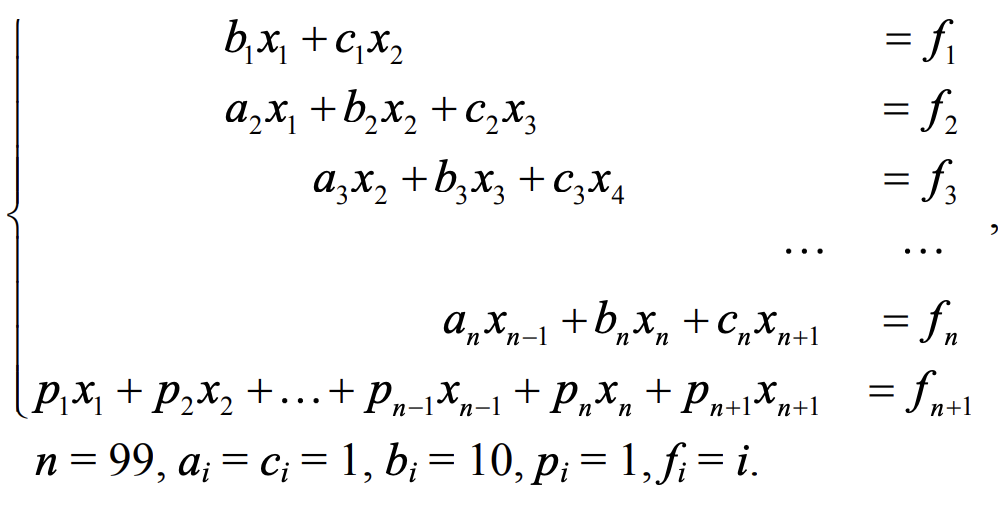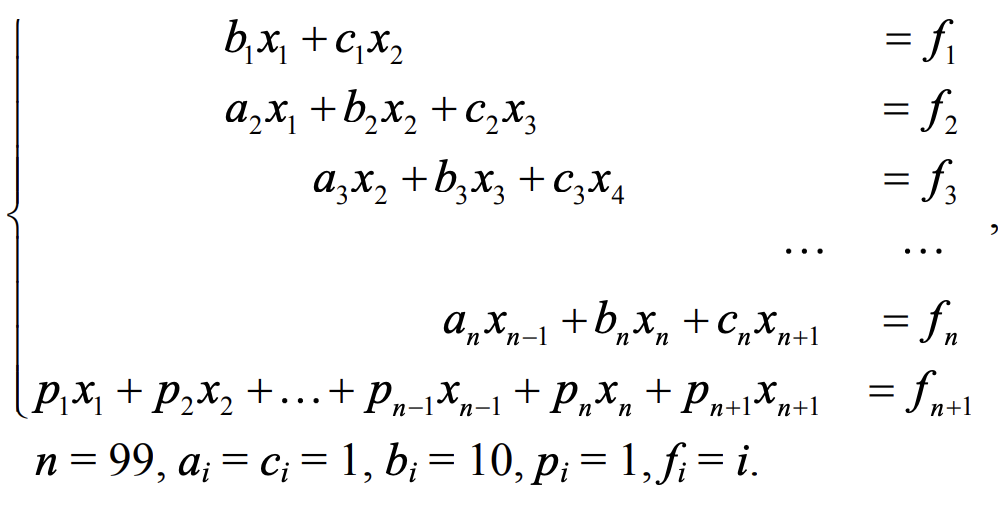

In [1]:
import numpy as np
import pprint
import scipy
import scipy.linalg 
import matplotlib.pyplot as plt
import math

In [2]:
## Function for operation with matrix
def MatNorm(vec):
  return np.max(np.abs(vec))

def MatrixElem(i: int, j: int):
  if i == 99:
    return 1
  else:
    if i == j:
      return 10
    elif i == (j + 1) or j == (i + 1):
      return 1
    else: 
      return 0

def GetMatrix():
  return np.fromfunction(np.vectorize(MatrixElem), (100, 100), dtype=np.double)

def BElem(i: int):
  return (i + 1)

def GetB():
  return np.fromfunction(np.vectorize(BElem), (100,), dtype = np.double)

Iteration methods: метод Зейделя, метод Якоби, метод верхней релаксации

In [3]:
def Jacobi(A, b, N=40, x=None): #initial matrix, solution vector, num of iterstion 
    # Create an initial guess of vector 0                                                                                                                                                           
    if x is None:
        x = np.zeros(len(A[0]))

    data = np.zeros(N)
    
    # Create a vector of the np.diagonal elements of A and subtract them from A                                                                                                                                                                                                                                                                                                                 
    D = np.diag(A)
    T = A - np.diagflat(D)
    
    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = (b - np.dot(T,x)) / D   
        diff = b - np.matmul(A, x)
        data[i] = MatNorm(diff)  

    print("The number of iteration is: %d" %(i+1))
    return x, data


def GaussSeidel(A, b, N=25, x=None):
    if x is None:
        x = np.zeros(len(A[0]))

    data = np.zeros(N)

    L = np.tril(A)
    U = A - L
    for i in range(N):
        x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
        diff = b - np.matmul(A, x)
        data[i] = MatNorm(diff)

    return x, data

def UpperRelaxation(A, b, w, N=20, x=None):
    
    if x is None:
        x = np.zeros(len(A[0]))

    data = np.zeros(N)

    u = np.triu(A)
    l = np.tril(A)
    L = A - u
    D = l + u - A
    U = A - l

    B = - np.matmul(np.linalg.inv(D + w * L), (w - 1) * D + w * U)
    F =   np.matmul(np.linalg.inv(D + w * L), b) * w

    for i in range(N):
        x = np.matmul(B, x) + F
        diff = b - np.matmul(A, x)
        data[i] = MatNorm(diff)

    return x, data

Direct methods: метод Гаусса с выбором главного элемента, LU-разложение.

In [4]:
def Gauss(A,b):
    #A = our intial matrix
    #b = solution vector
    n = len(A)
    M = A

    M = np.hstack((M,np.array([b]).T))

    for i in range(n):

        leading = i + np.argmax(np.abs(A[:,i][i:]))
        M[[i, leading]] = M[[leading, i]] 

        M[i] /= M[i][i]
        row = M[i]

        for r in M[i + 1:]:
            r -= r[i] * row

    for i in range(n - 1, 0, -1):
        row = M[i]
        for r in reversed(M[:i]):
            r -= r[i] * row

    return M[:,-1]

def LUmethod(A, f):
    P, L, U = scipy.linalg.lu(A)
    y = Gauss(L, f)
    x = Gauss(U, y)
    return x

Непосредственно решение и графики :)

The number of iteration is: 40


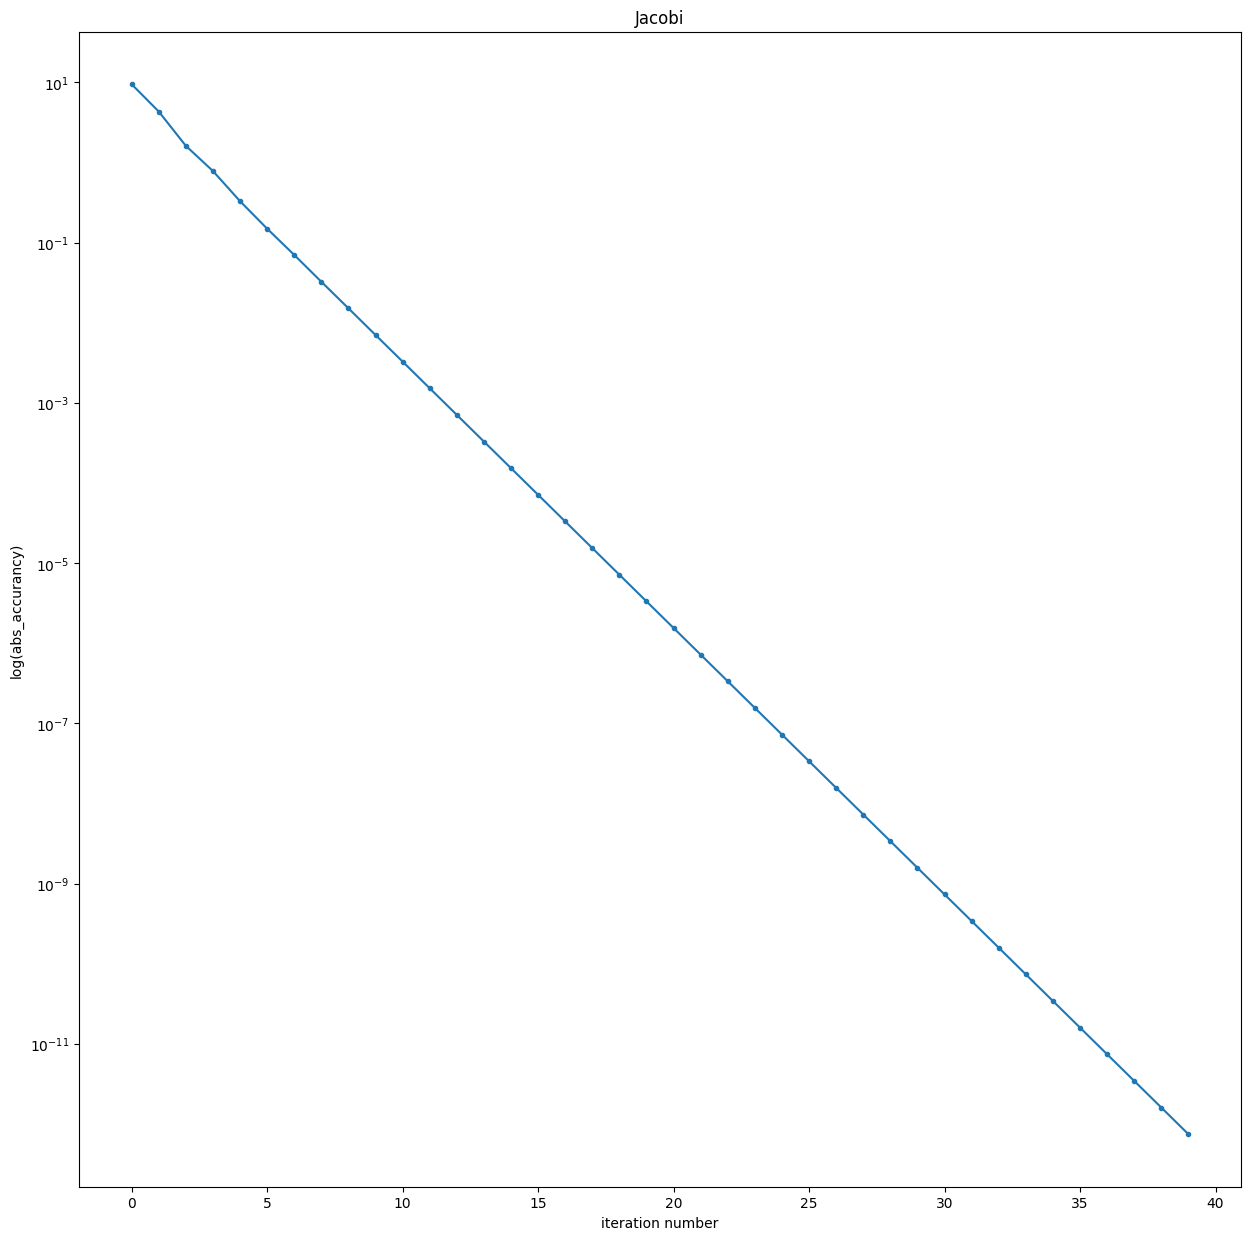

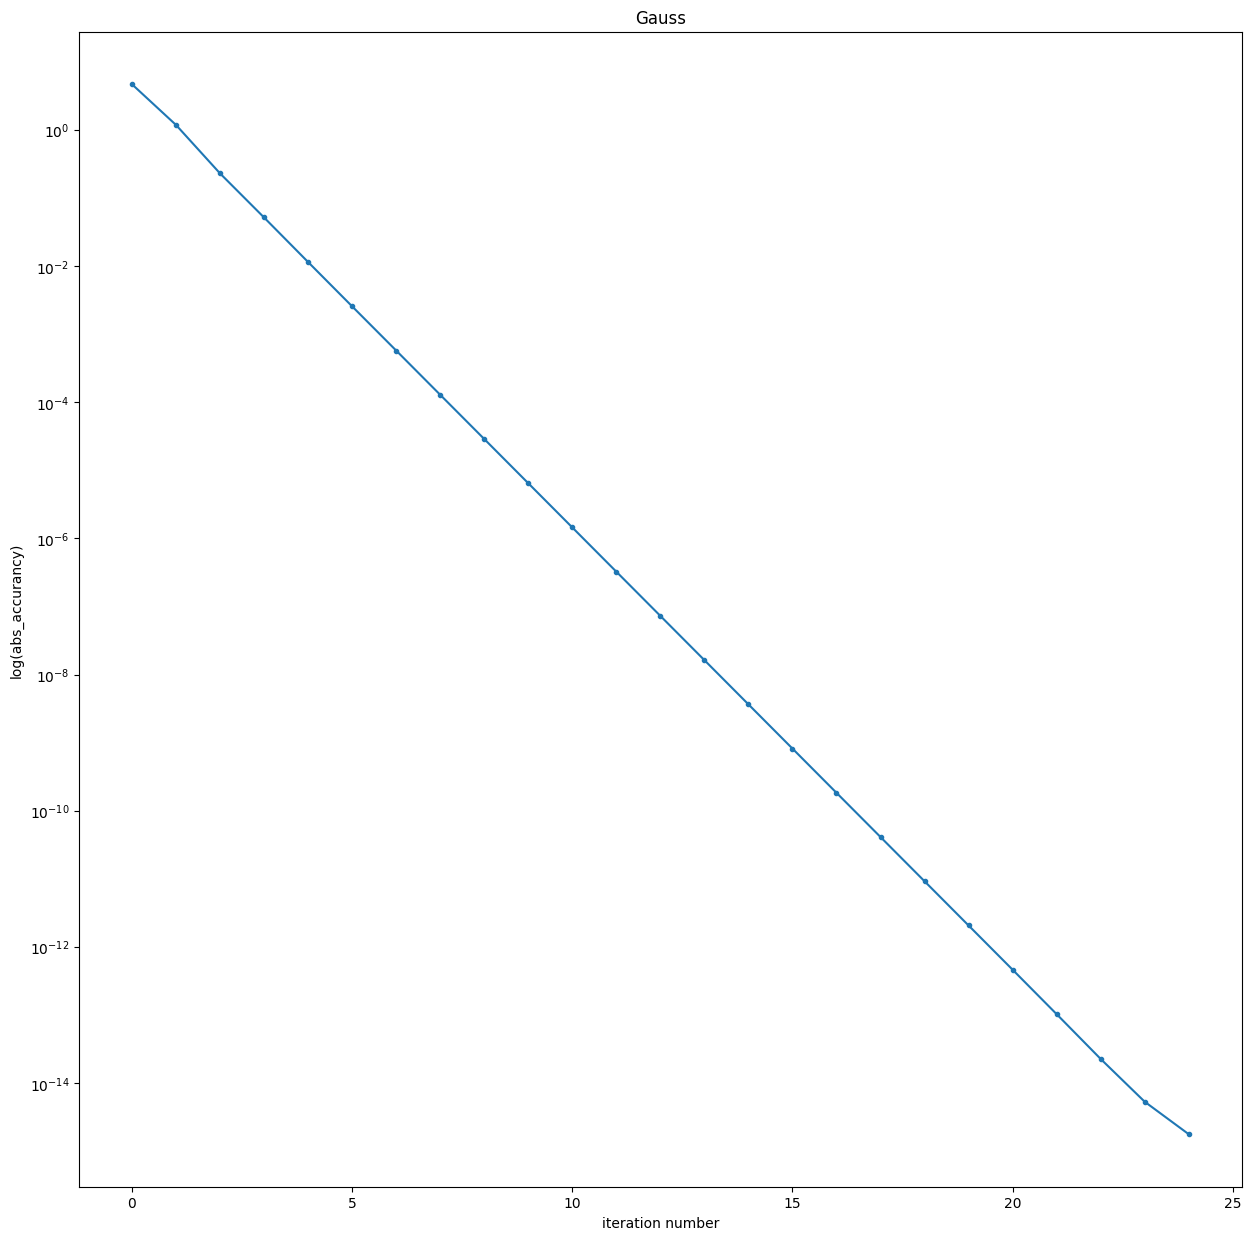

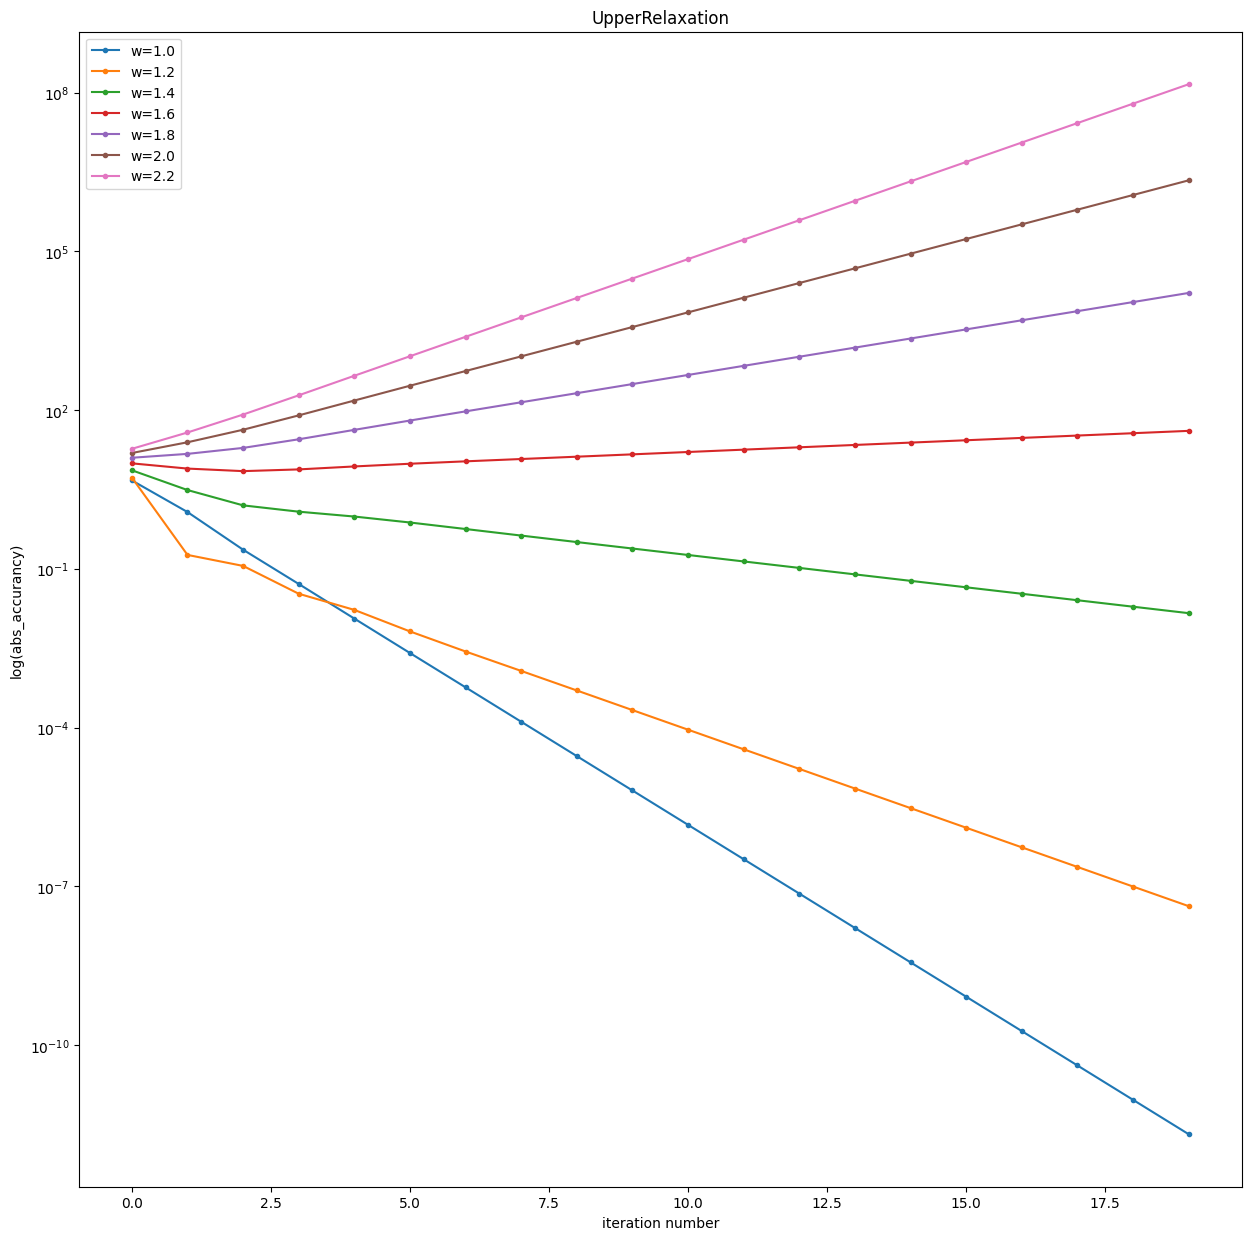

In [5]:
def plot(title, data):
    plt.figure(figsize=(15, 15))

    plt.xlabel("iteration number")
    plt.ylabel("log(abs_accurancy)")
    plt.yscale("log")

    plt.title(title)
    iterations = [i for i in range(len(data))]
    plt.plot(iterations, data, ".-")
    plt.show()

def plot_few(title, names, datas):
    plt.figure(figsize=(15, 15))

    plt.xlabel("iteration number")    
    plt.ylabel("log(abs_accurancy)")
    plt.yscale("log")

    plt.title(title)
    for ind in range(len(datas)):
        iterations = [i for i in range(len(datas[ind]))]
        plt.plot(iterations, datas[ind], ".-", label=names[ind])
        plt.legend()
    plt.show()


eps = 1e-6

mat = GetMatrix()
b = GetB()

# Проверка подстановкой решения связки для прямых методов.
x = Gauss(mat, b)
assert(MatNorm(np.matmul(mat,x) - b) < eps)
x = LUmethod(mat, b)
assert(MatNorm(np.matmul(mat,x) - b) < eps)

# Графики итерационных методов
A = np.array([[4.0,-1.0,1.0],[2.0,5.0,2.0],[1.0,2.0,4.0]])
b = np.array([8.0,3.0,11.0])
x, data = Jacobi(A, b)
plot("Jacobi", data)

x, data = GaussSeidel(A, b)
plot("Gauss", data)

data_for_relaxation = []
names = []
for w in np.arange(1., 2.2, 0.2):
    w = math.ceil(w * 10) / 10
    x, data = UpperRelaxation(A, b, w)
    data_for_relaxation.append(data)
    names.append("w=" + str(w))

plot_few("UpperRelaxation", names, data_for_relaxation)

Для итерационных методов связка уменьшается экспоненциально от числа итераций.
На третьем графике видно, что метод верхней релаксации сходится, начиная с w = 1.4.